In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# use colorblind palette
sns.set_palette("colorblind")


KeyboardInterrupt: 

In [ ]:
df_cnn = pd.read_csv("../data/out/generalization/e7ivqipk.csv")
df_cnn["filter"] = "cnn"
df_lmb = pd.read_csv("../data/out/lmb_summary.csv")
df_glmb = pd.read_csv("../data/out/glmb_summary.csv")
df_combined = pd.concat([df_cnn, df_lmb, df_glmb])


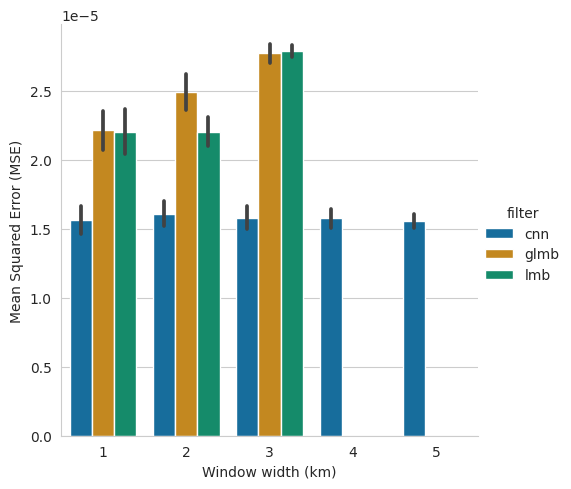

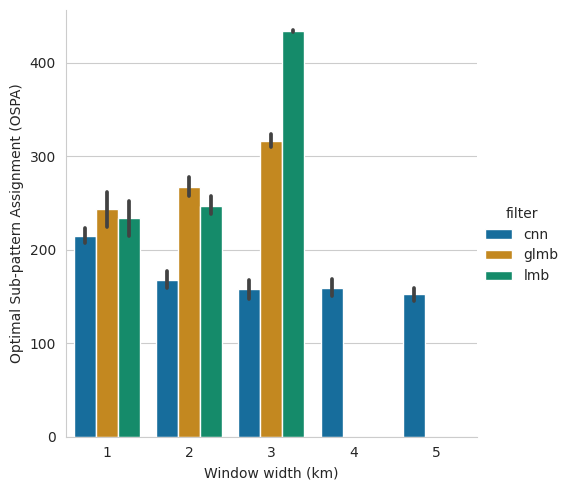

In [ ]:
data = df_combined.groupby(["filter", "scale", "simulation_idx"], as_index=False).mean()
sns.catplot(data=data, x="scale", y="mse", hue="filter", kind="bar", errorbar="ci")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/mse.png")
plt.savefig("../figures/mse.pdf")
plt.show()

sns.catplot(data=data, x="scale", y="ospa", hue="filter", kind="bar", errorbar="ci")
plt.ylabel("Optimal Sub-pattern Assignment (OSPA)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/ospa.png")
plt.savefig("../figures/ospa.pdf")
plt.show()


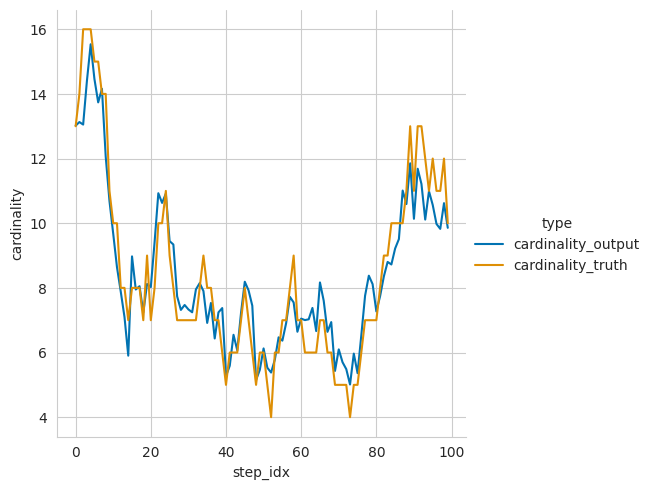

In [ ]:
data = df_cnn.query("scale == 1 and simulation_idx == 50").melt(
    id_vars=["step_idx"],
    value_vars=["cardinality_output", "cardinality_truth"],
    var_name="type",
    value_name="cardinality",
)
sns.relplot(data=data, x="step_idx", y="cardinality", hue="type", kind="line")


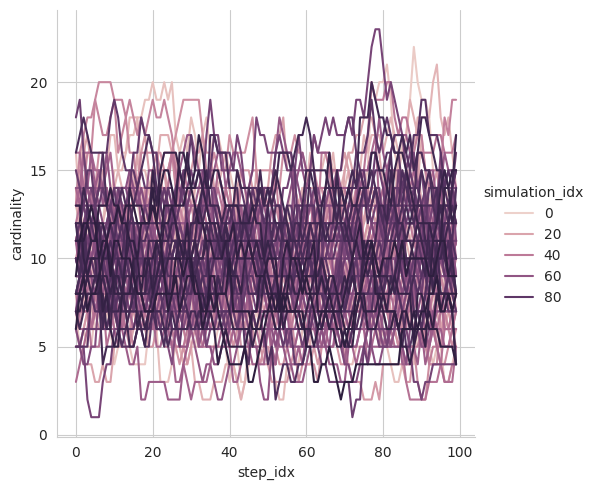

In [ ]:
data = df_cnn.query("scale == 1").melt(
    id_vars=["step_idx", "simulation_idx"],
    value_vars=["cardinality_truth"],
    var_name="type",
    value_name="cardinality",
)
sns.relplot(data=data, x="step_idx", y="cardinality", hue="simulation_idx", kind="line")
